In [1]:
# IT2011- Artificial Intelligence and Machine Learning
# Group Assignment

# ============================
# 2025-Y2-S1-MLB-B3G2-05
# AI for Early Diabetes Prediction
# ============================


# Import the libraries we will need
import pandas as pd # The primary library for working with data tables
import seaborn as sns # A powerful library for creating statistical visualizations
import matplotlib.pyplot as plt # The foundational library for plotting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Read the original CSV file into a pandas DataFrame called 'df'

from google.colab import files
uploaded = files.upload()   # choose the file manually

df = pd.read_csv('diabetes_prediction_dataset.csv')


# Display the first 5 rows of the table to confirm the data has been loaded correctly
print("Dataset loaded successfully. Here are the first 5 rows:")
df.head()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
Dataset loaded successfully. Here are the first 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**IT24100314 - Dahanayake L.K**

**Handling Incorrect/Implausible Data**

Statistical summary of the dataset BEFORE cleaning:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.00000

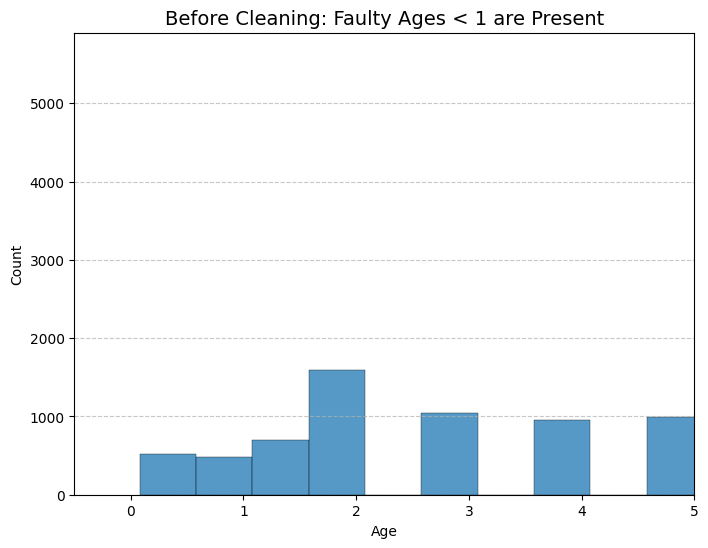

In [3]:
# ============================
# IT24100314 - Dahanayake L.K
# Handling Incorrect/Implausible Data
# ============================


# Use the describe() method to get a statistical summary of the data
print("Statistical summary of the dataset BEFORE cleaning:")
print(df.describe())

# --- VISUALIZATION 1: SHOWING THE PROBLEM (BEFORE CLEANING) ---

print("\n--- Visualizing the 'age' column BEFORE cleaning (Zoomed In) ---")
print("This plot clearly shows the data points with an age less than 1.")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', binwidth=0.5) # binwidth gives us more detail at this scale
plt.title('Before Cleaning: Faulty Ages < 1 are Present', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(-0.5, 5) # We zoom in on the problem area between ages 0 and 5
plt.xticks([0, 1, 2, 3, 4, 5]) # This makes the x-axis ticks clear
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
# Justification: An age less than 1 is medically implausible for this study.
# I will replace these error values with the median of the valid data.

# 1. Calculate the median of the 'age' column, excluding the implausible values (age < 1)
age_median = df[df['age'] > 1]['age'].median()
print(f"The median age of valid patients is: {age_median}")

# 2. Replace the implausible age values with this calculated median
df.loc[df['age'] < 1, 'age'] = age_median
print(f"Successfully replaced implausible age values.")

# 3. Verify the fix by checking the statistics AGAIN.
print("\nStatistical summary AFTER fixing implausible values:")
print(df.describe())

The median age of valid patients is: 43.0
Successfully replaced implausible age values.

Statistical summary AFTER fixing implausible values:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       42.272779       0.07485       0.039420      27.320767   
std        22.164981       0.26315       0.194593       6.636783   
min         1.000000       0.00000       0.000000      10.010000   
25%        25.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min      


Data type of 'age' column BEFORE fixing: float64
Data type of 'age' column AFTER fixing: int64

First 5 rows with corrected integer ages:

--- Visualizing the 'age' column AFTER cleaning (Zoomed In) ---
This plot confirms the faulty ages have been removed.


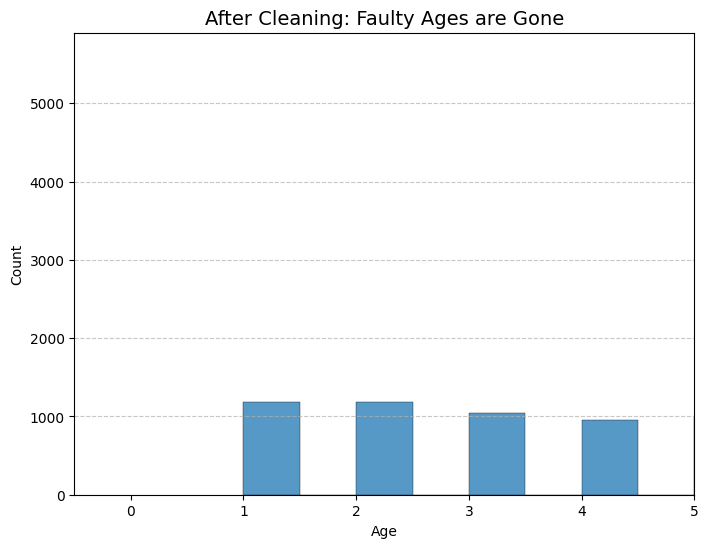

In [5]:
# --- Correcting Age Data Type ---

# 1. Show the data type of 'age' column is a 'float' BEFORE fixing
print("\nData type of 'age' column BEFORE fixing:", df['age'].dtype)

# 2. Change the data type of the 'age' column from float to integer
df['age'] = df['age'].astype(int)

# 3. Show the data type is now an 'int' AFTER fixing
print("Data type of 'age' column AFTER fixing:", df['age'].dtype)

# Finally, look at the first 5 rows to see the clean, integer ages
print("\nFirst 5 rows with corrected integer ages:")
df.head()

# --- VISUALIZATION 2: SHOWING THE FIX (AFTER CLEANING) ---

print("\n--- Visualizing the 'age' column AFTER cleaning (Zoomed In) ---")
print("This plot confirms the faulty ages have been removed.")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', binwidth=0.5)
plt.title('After Cleaning: Faulty Ages are Gone', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(-0.5, 5) # We zoom into the EXACT SAME area to provide a clear comparison
plt.xticks([0, 1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Save the fully cleaned DataFrame to a new CSV file
df.to_csv('IT24100314_Implausible_Data_Cleaning.csv', index=False)

print("\nFinal cleaned dataset has been successfully saved as 'IT24100314_Implausible_Data_Cleaning.csv'")


Final cleaned dataset has been successfully saved as 'IT24100314_Implausible_Data_Cleaning.csv'


**IT24100283 - Devinda S.U.V**
**Encoding Categorical Variables (One-Hot Encoding)**

In [7]:
# ============================
# IT24100283 - Devinda S.U.V
# Encoding Categorical Variables (One-Hot Encoding)
# ============================

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [8]:
# Step 2: Apply One-Hot Encoding to 'smoking_history'
df_onehot = pd.get_dummies(df, columns=["smoking_history"], prefix="smoking", dtype=int)

# Step 3: Save the updated dataset
df_onehot.to_csv("IT24100283_onehot_encoding.csv", index=False)

print("\nOne-Hot Encoding completed. File saved as 'IT24100283_onehot_encoding.csv'")
df_onehot.head()


One-Hot Encoding completed. File saved as 'IT24100283_onehot_encoding.csv'


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,Female,80,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,Female,54,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,Male,28,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,Female,36,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,Male,76,1,1,20.14,4.8,155,0,0,1,0,0,0,0


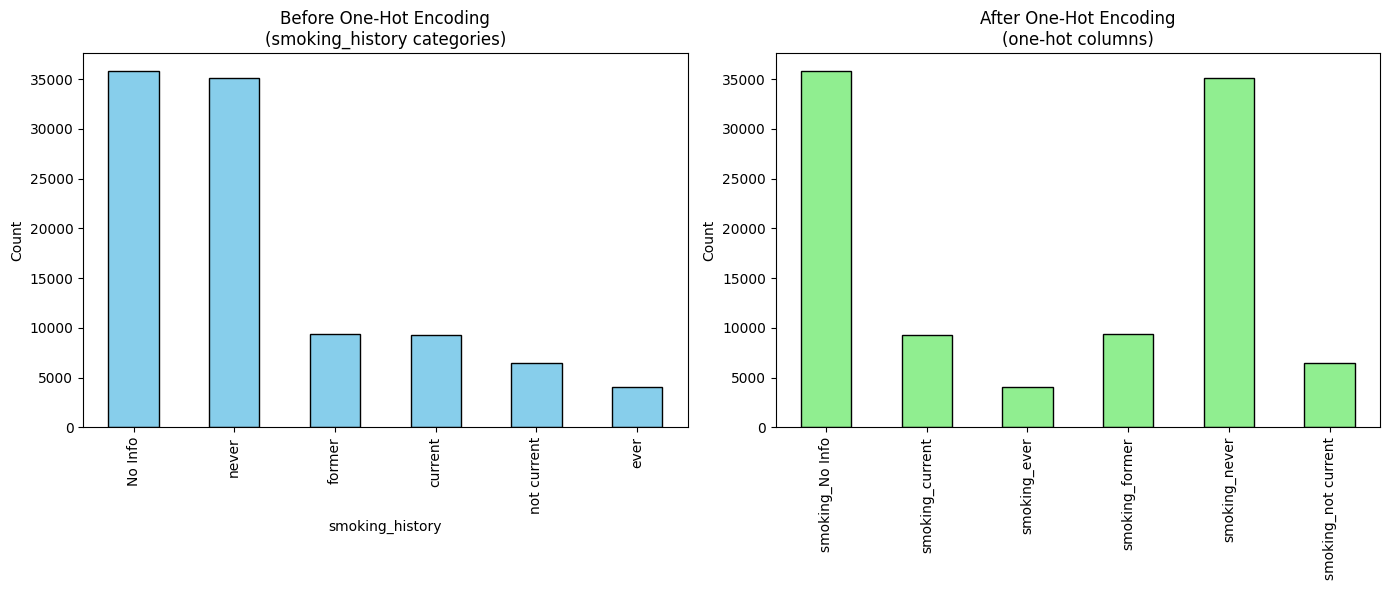

In [9]:
# Step 4: Plot before vs after encoding for smoking_history
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before encoding: original categories
df["smoking_history"].value_counts().plot(
    kind="bar", ax=axes[0], color="skyblue", edgecolor="black"
)
axes[0].set_title("Before One-Hot Encoding\n(smoking_history categories)")
axes[0].set_ylabel("Count")

# After encoding: one-hot columns (sum of 1s in each column)
df_onehot[df_onehot.filter(like="smoking_").columns].sum().plot(
    kind="bar", ax=axes[1], color="lightgreen", edgecolor="black"
)
axes[1].set_title("After One-Hot Encoding\n(one-hot columns)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**IT24100263 - Dilhani W. P. K. A**
**Encoding Categorical Variables (Label Encoding)**

In [10]:
# ============================
# IT24100263 - Dilhani W. P. K. A
# Encoding Categorical Variables (Label Encoding)
# ============================

# loading the diabetes dataset to a pandas DataFrame
df_onehot.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,Female,80,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,Female,54,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,Male,28,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,Female,36,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,Male,76,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [11]:
# Step 1 - Pre-Encoding Cleaning


# Clean (lowercase and strip)
df_onehot['gender'] = df_onehot['gender'].str.lower().str.strip()

# Handle "other" - Drop negligible rows (only ~0.018% of data)
initial_rows = len(df_onehot)
df_label = df_onehot[df_onehot['gender'] != 'other']  # Drop rows where gender == 'other'
dropped_rows = initial_rows - len(df_label)
print(f"\nDropped {dropped_rows} rows with 'other' gender (negligible: {dropped_rows/initial_rows*100:.3f}% of data)")

# Verify after dropping
print("\nUnique values in gender after dropping 'other':", df_label['gender'].unique())
print("\nOriginal gender distribution (after cleaning & dropping):\n", df_label['gender'].value_counts(normalize=True))


Dropped 18 rows with 'other' gender (negligible: 0.018% of data)

Unique values in gender after dropping 'other': ['female' 'male']

Original gender distribution (after cleaning & dropping):
 gender
female    0.585625
male      0.414375
Name: proportion, dtype: float64


In [12]:
# Step 2 - Apply Label Encoding
X = df_label.drop('diabetes', axis=1)
y = df_label['diabetes']
le = LabelEncoder()
X['gender_encoded'] = le.fit_transform(X['gender'])
X = X.drop('gender', axis=1)

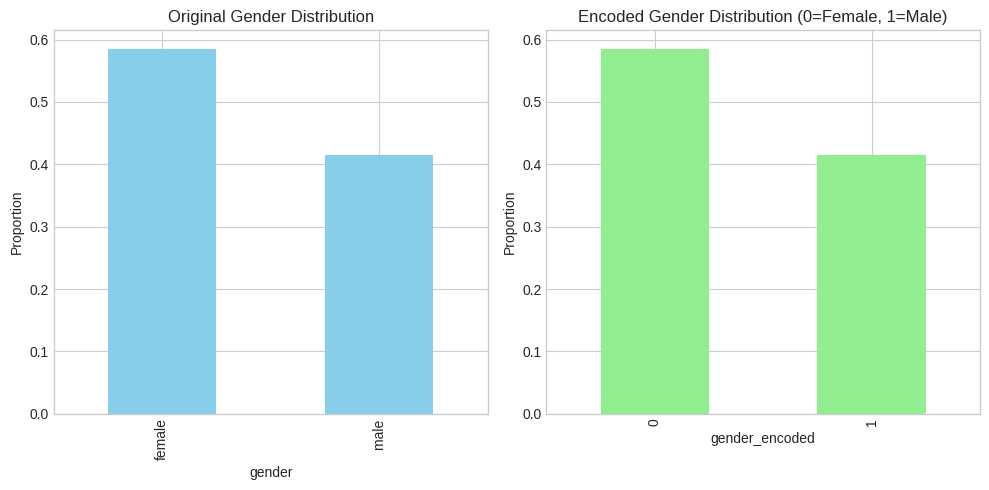

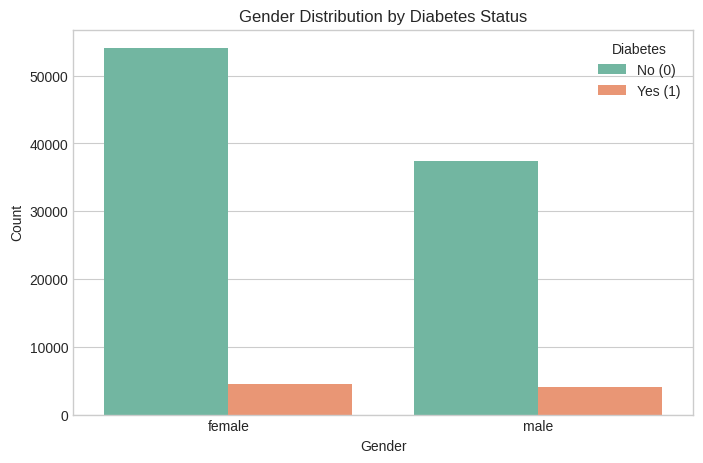


Encoded gender distribution:
 gender_encoded
0    0.585625
1    0.414375
Name: proportion, dtype: float64

Unique values in gender_encoded: [np.int64(0), np.int64(1)]


In [13]:
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1 - Original vs Encoded Gender Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df_label['gender'].value_counts(normalize=True).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Original Gender Distribution')
axes[0].set_ylabel('Proportion')
X['gender_encoded'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Encoded Gender Distribution (0=Female, 1=Male)')
axes[1].set_ylabel('Proportion')
plt.tight_layout()
plt.show()

# Plot 2 - Gender vs Diabetes (Original Data)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_label, x='gender', hue='diabetes', palette='Set2')
plt.title('Gender Distribution by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
plt.show()

print("\nEncoded gender distribution:\n", X['gender_encoded'].value_counts(normalize=True))
print("\nUnique values in gender_encoded:", sorted(X['gender_encoded'].unique()))


In [14]:
# Combine encoded features (X) with target variable (y) into one dataset
df_label = pd.concat([X, y], axis=1)

df_label.to_csv("IT24100263_label_encoding.csv", index=False)
print("Saved with all columns included")

Saved with all columns included


**IT24100239 - DISANAYAKA D.M.C.N**
**Data Splitting & Outlier Handling**

In [15]:
# ============================
# IT24100239 - DISANAYAKA D.M.C.N
#Data Preprocessing : Data Splitting & Outlier Handling
# ============================

# --- Load the cleaned dataset ---

#Loading the preprocessed dataset from previous team member
df_label.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,gender_encoded,diabetes
0,80,0,1,25.19,6.6,140,0,0,0,0,1,0,0,0
1,54,0,0,27.32,6.6,80,1,0,0,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0
3,36,0,0,23.45,5.0,155,0,1,0,0,0,0,0,0
4,76,1,1,20.14,4.8,155,0,1,0,0,0,0,1,0


In [16]:
# --- FIX: Check for and remove missing values in the 'diabetes' column ---
print(f"Number of missing values in 'diabetes' before cleaning: {df_label['diabetes'].isna().sum()}")

# Drop rows where the 'diabetes' column is NaN
df_label.dropna(subset=['diabetes'], inplace=True)

print(f"Number of rows after removing NaNs: {df_label.shape[0]}")
print(f"Number of missing values in 'diabetes' after cleaning: {df_label['diabetes'].isna().sum()}")


# --- Phase 2: The Crucial Split ---
# Separate features (X) and target (y)
X = df_label.drop('diabetes', axis=1)
y = df_label['diabetes']

# Split the data into 80% training and 20% testing
# stratify=y ensures the proportion of diabetes cases is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into {X_train.shape[0]} training samples and {X_test.shape[0]} test samples.")

# --- 2. Save the Test Set Files ---
# This is a crucial step. These files will not be touched until the final model evaluation.
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("Saved untouched test set to 'X_test.csv' and 'y_test.csv'.")

print("\n--- Data Split Details ---")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Number of missing values in 'diabetes' before cleaning: 0
Number of rows after removing NaNs: 99982
Number of missing values in 'diabetes' after cleaning: 0

Data split into 79985 training samples and 19997 test samples.
Saved untouched test set to 'X_test.csv' and 'y_test.csv'.

--- Data Split Details ---
Training set has 79985 samples.
Testing set has 19997 samples.


Summary statistics BEFORE outlier handling:

                bmi   HbA1c_level  blood_glucose_level
count  99982.000000  99982.000000         99982.000000
mean      27.320757      5.527529           138.057810
std        6.636853      1.070665            40.709469
min       10.010000      3.500000            80.000000
25%       23.630000      4.800000           100.000000
50%       27.320000      5.800000           140.000000
75%       29.580000      6.200000           159.000000
max       95.690000      9.000000           300.000000

Generating EDA visualizations for outlier analysis...


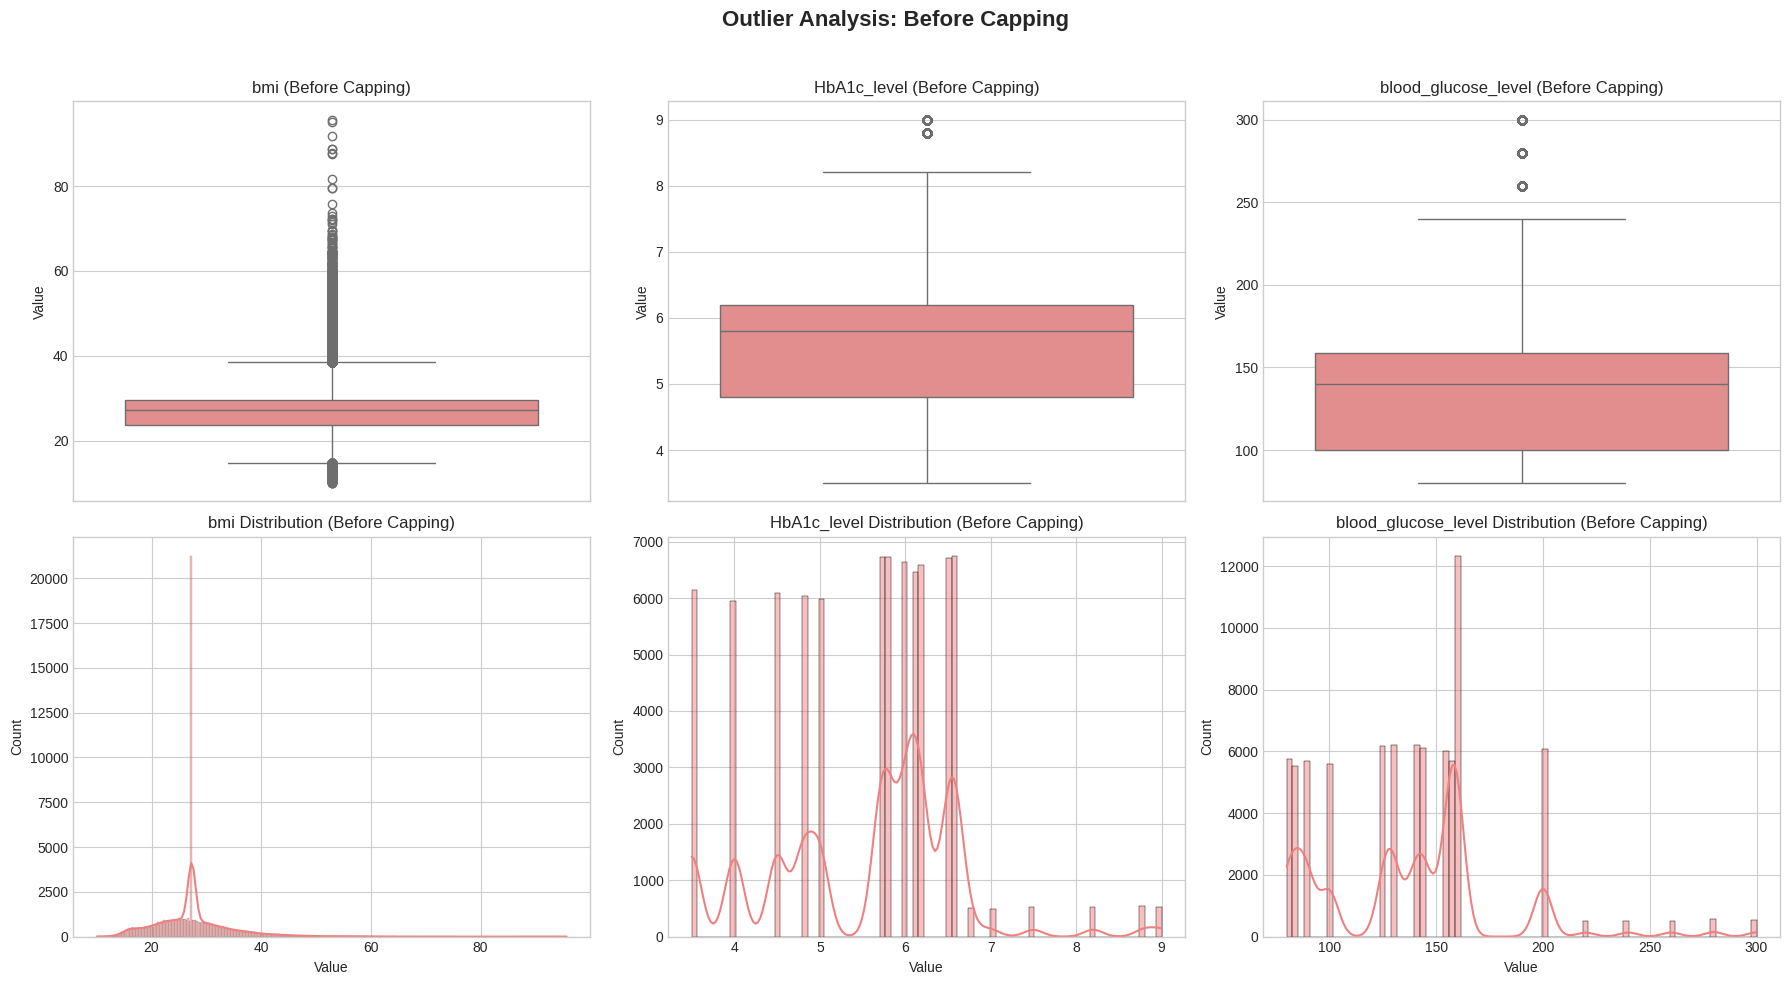

In [17]:
# --- Phase 3: Outlier Handling on the Training Set ---

# 1. Identify numerical columns where outliers are likely
numerical_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# 2. EDA: Visualize outliers BEFORE capping (Your first visualization)
print("Summary statistics BEFORE outlier handling:\n")
print(df_label[numerical_cols].describe())

print("\nGenerating EDA visualizations for outlier analysis...")

#Create a more comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Outlier Analysis: Before Capping', fontsize=16, fontweight='bold')

#Before treatment - Boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=X_train[col], ax=axes[0, i], color='lightcoral')
    axes[0, i].set_title(f'{col} (Before Capping)')
    axes[0, i].set_ylabel('Value')

#Before treatment - Histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(X_train[col], ax=axes[1, i], kde=True, color='lightcoral')
    axes[1, i].set_title(f'{col} Distribution (Before Capping)')
    axes[1, i].set_xlabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [18]:
# 3. Apply Capping using the IQR Method
X_train_capped = X_train.copy()

print("\n--- Capping Outliers in Training Data ---")
for col in numerical_cols:
    Q1 = X_train_capped[col].quantile(0.25)
    Q3 = X_train_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    X_train_capped[col] = X_train_capped[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"'{col}' capped at Lower: {lower_bound:.2f} and Upper: {upper_bound:.2f}")


--- Capping Outliers in Training Data ---
'bmi' capped at Lower: 14.74 and Upper: 38.50
'HbA1c_level' capped at Lower: 2.70 and Upper: 8.30
'blood_glucose_level' capped at Lower: 11.50 and Upper: 247.50



Summary statistics AFTER outlier handling:

                bmi   HbA1c_level  blood_glucose_level
count  79985.000000  79985.000000         79985.000000
mean      26.997502      5.520135           137.335663
std        5.677205      1.047210            38.520006
min       14.740000      3.500000            80.000000
25%       23.650000      4.800000           100.000000
50%       27.320000      5.800000           140.000000
75%       29.590000      6.200000           159.000000
max       38.500000      8.300000           247.500000


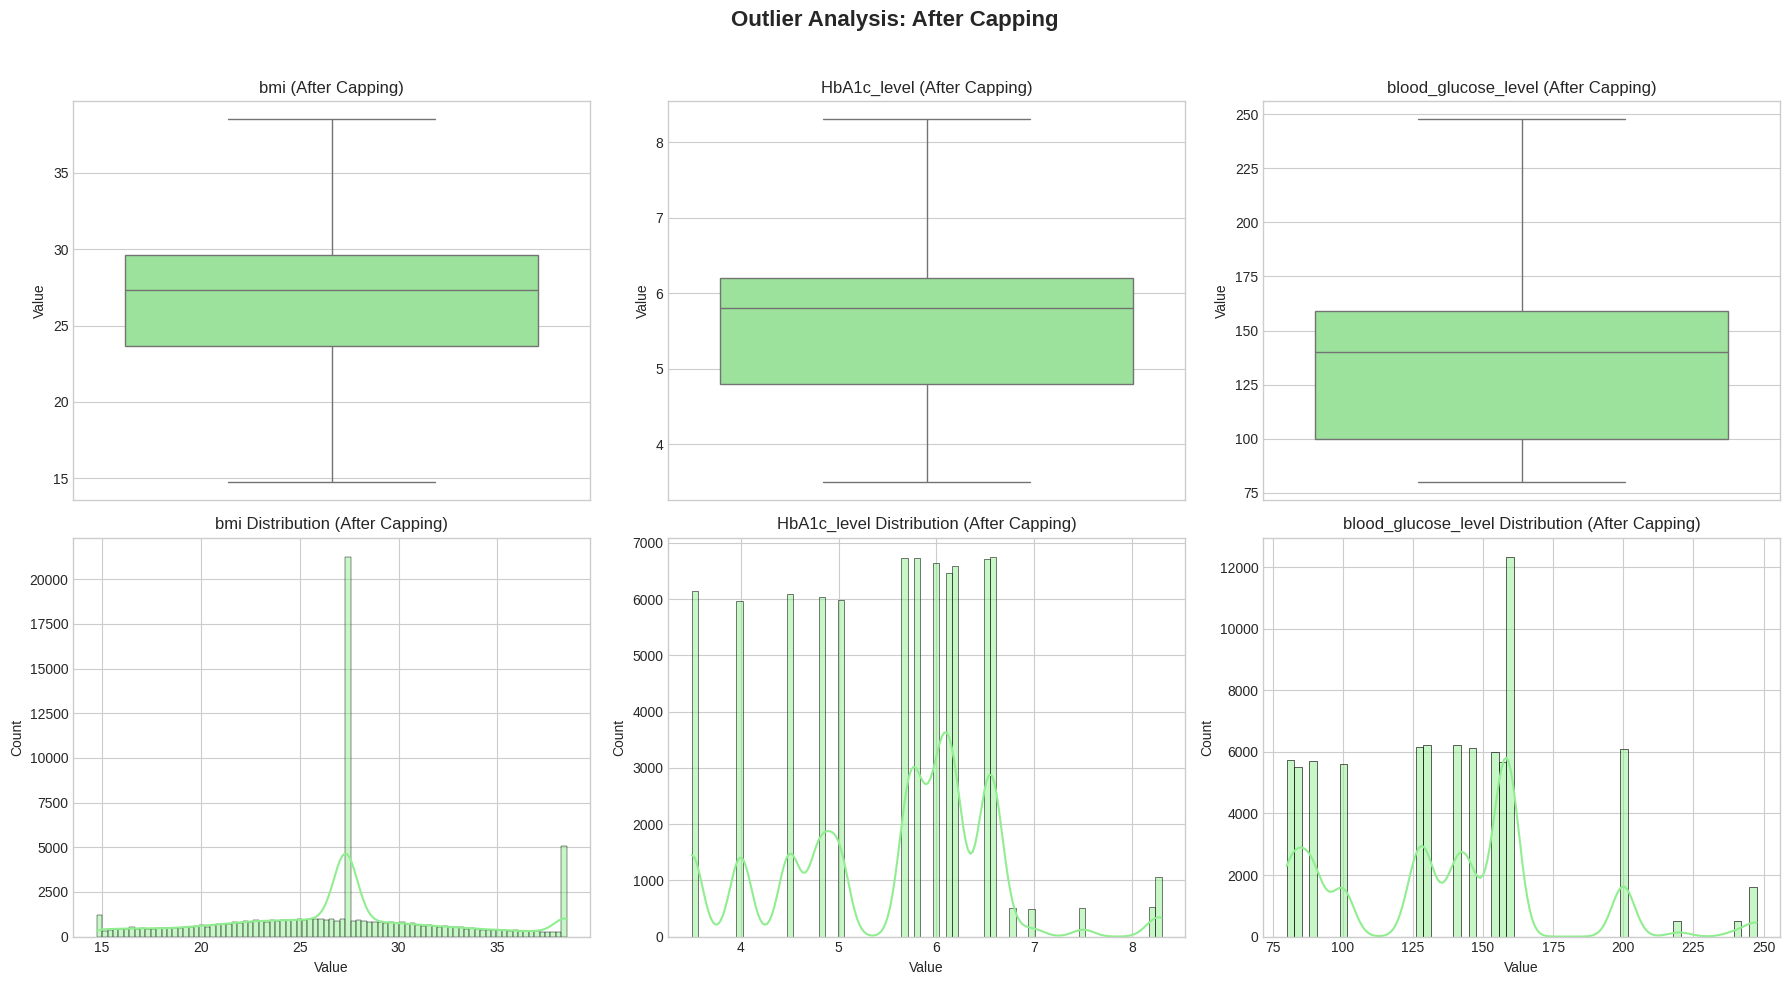

In [19]:
# 4. EDA: Visualize the result AFTER capping
print("\nSummary statistics AFTER outlier handling:\n")
print(X_train_capped[numerical_cols].describe())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Outlier Analysis: After Capping', fontsize=16, fontweight='bold')

#After treatment - Boxplots
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=X_train_capped[col], ax=axes[0, i], color='lightgreen')
  axes[0, i].set_title(f'{col} (After Capping)')
  axes[0, i].set_ylabel('Value')

#After treatment - Histograms
for i, col in enumerate(numerical_cols):
  sns.histplot(X_train_capped[col], ax=axes[1, i], kde=True, color='lightgreen')
  axes[1, i].set_title(f'{col} Distribution (After Capping)')
  axes[1, i].set_xlabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])


In [20]:
# --- Save the processed training data ---

# This file will be used by the next members in the pipeline
df_outlier = X_train_capped.copy()
df_outlier['diabetes'] = y_train
df_outlier.to_csv('IT24100239_Outlier_handling.csv', index=False)
print("\nProcessed training data saved to 'IT24100239_Outlier_handling.csv'")


Processed training data saved to 'IT24100239_Outlier_handling.csv'


**IT24100237 - Bandara R. M. G. L**
**Dataset imbalance handling**

In [21]:
# ============================
# IT24100237 - Bandara R. M. G. L
# Dataset imbalance handling
# ============================

# Look at the first 5 rows to make sure it's correct
print("Dataset after outlier handling loaded successfully.")
df_outlier.head()

Dataset after outlier handling loaded successfully.


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,gender_encoded,diabetes
47095,20,0,0,33.42,3.5,126.0,0,0,0,0,1,0,1,0
97571,77,0,0,30.98,6.2,130.0,0,0,0,0,1,0,0,0
16749,27,0,0,38.50,6.2,130.0,1,0,0,0,0,0,0,0
12730,35,0,0,27.27,3.5,126.0,1,0,0,0,0,0,0,0
95158,25,0,0,31.61,5.8,90.0,0,1,0,0,0,0,0,0


Class distribution before balancing:
diabetes
0    73185
1     6800
Name: count, dtype: int64


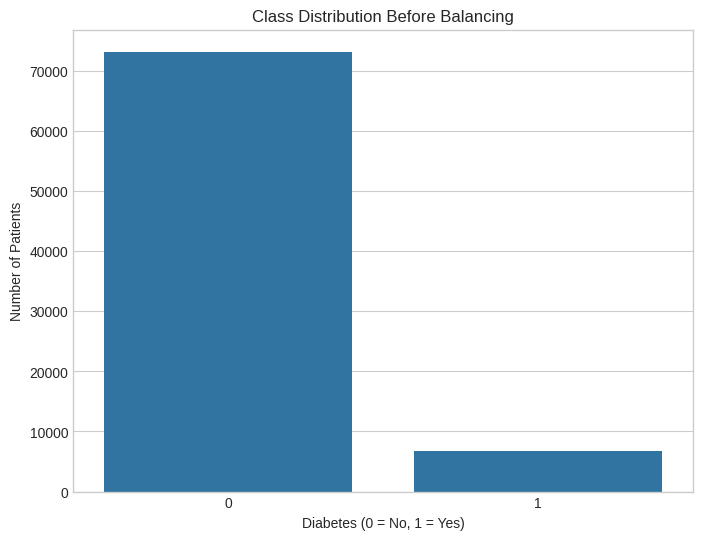

In [ ]:
# --- EDA Task: Show Class Imbalance ---

# Count the number of patients in each class (0 = No Diabetes, 1 = Yes)
print("Class distribution before balancing:")
print(df_outlier['diabetes'].value_counts())

# Create your EDA visualization: a bar chart to show the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df_outlier)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()
from sklearn.model_selection import train_test_split


In [23]:
# --- Undersampling the Training Data ---

# Separate the majority and minority classes from the TRAINING data
df_train_majority = df_outlier[df_outlier.diabetes == 0]
df_train_minority = df_outlier[df_outlier.diabetes == 1]

# Undersample the majority class
df_train_majority_undersampled = df_train_majority.sample(n=len(df_train_minority), random_state=42)

# Combine the minority class with the undersampled majority class
df_train_balanced = pd.concat([df_train_minority, df_train_majority_undersampled])

# Shuffle the final balanced dataframe to mix the samples
df_train_balanced = df_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced training data back into X and y
X_train_balanced = df_train_balanced.drop('diabetes', axis=1)
y_train_balanced = df_train_balanced['diabetes']

print("TRAINING data has been balanced successfully using undersampling.")

TRAINING data has been balanced successfully using undersampling.



Class distribution of the TRAINING set after balancing:
diabetes
0    6800
1    6800
Name: count, dtype: int64


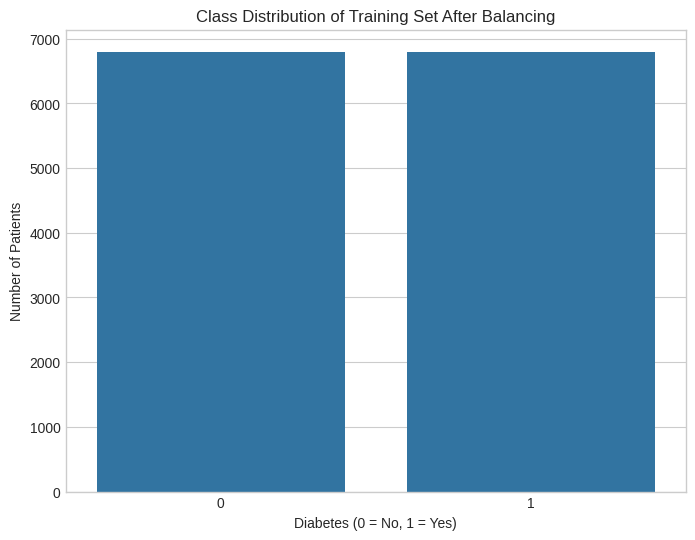

In [24]:
# --- Verify the Balancing of the TRAINING Data ---

# Count the values in the new balanced training target
print("\nClass distribution of the TRAINING set after balancing:")
print(y_train_balanced.value_counts())

# Create another bar chart to visually prove it
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced) # We can plot the 'y' series directly
plt.title('Class Distribution of Training Set After Balancing')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

In [25]:
# --- Saving the files for the next team member ---

# Save the final, balanced training sets
df_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)

df_balanced.to_csv("IT24100237_imbalance_handling.csv", index=False)
print("Saved with all columns included")


Saved with all columns included


**IT24100300 - Dulakshika A.L.S.H**
**Normalization / Scaling**

In [26]:
# ============================
# IT24100300 - Dulakshika A.L.S.H
# Normalization / Scaling
# ============================

from sklearn.preprocessing import MinMaxScaler  # <-- Make sure to import MinMaxScaler

# Look at the first 5 rows
df_balanced.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,gender_encoded,diabetes
0,69,1,0,32.34,6.0,200.0,0,0,0,1,0,0,1,0
1,58,0,0,34.66,6.6,145.0,0,0,0,0,1,0,1,1
2,65,0,1,38.50,6.2,220.0,0,0,0,1,0,0,0,1
3,78,0,0,27.32,8.3,247.5,1,0,0,0,0,0,1,1
4,75,0,0,34.45,5.7,240.0,0,0,0,0,0,1,0,1


The following columns have been selected for scaling:
['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Plotting feature distributions before scaling...


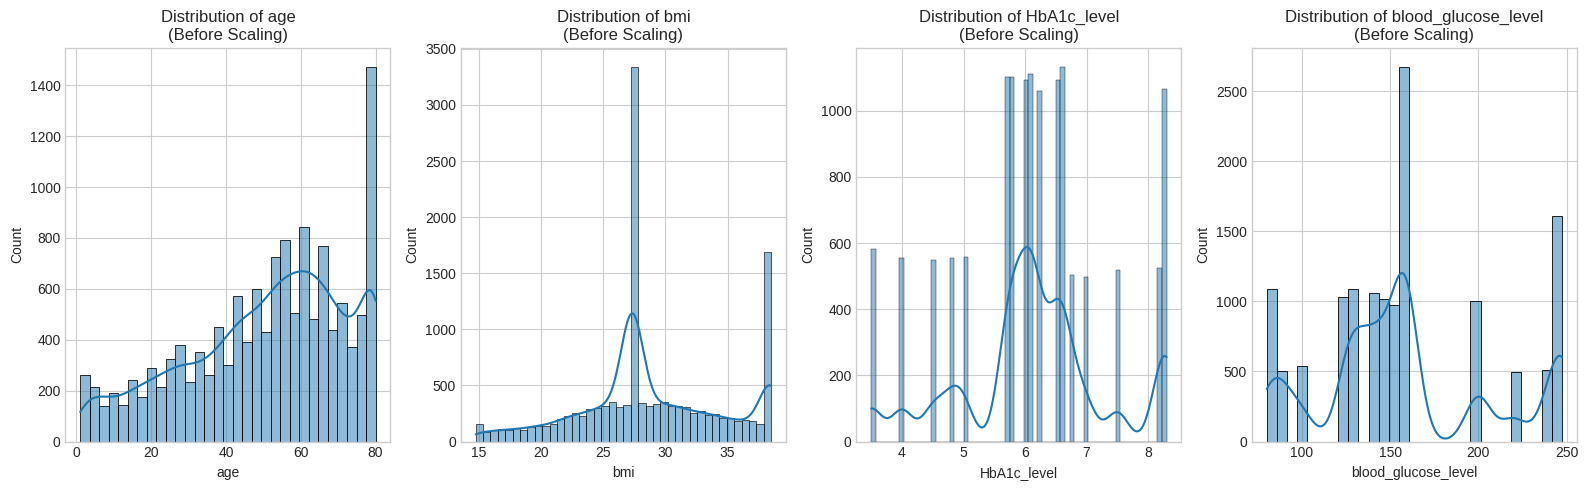

In [27]:
# We will scale the continuous numerical features that have different ranges.
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

print("The following columns have been selected for scaling:")
print(columns_to_scale)

# --- EDA: Visualizing Data BEFORE Scaling ---
print("Plotting feature distributions before scaling...")

plt.figure(figsize=(16, 5)) # Create a wider figure to hold the plots

# Loop through each column and create a histogram
for i, col in enumerate(columns_to_scale):
    plt.subplot(1, 4, i+1) # Create a subplot in a 1x4 grid
    sns.histplot(df_balanced[col], kde=True)
    plt.title(f'Distribution of {col}\n(Before Scaling)')
plt.tight_layout()
plt.show()

Data has been successfully scaled using MinMaxScaler.
Here are the first 5 rows of the scaled data:

Plotting feature distributions after scaling...


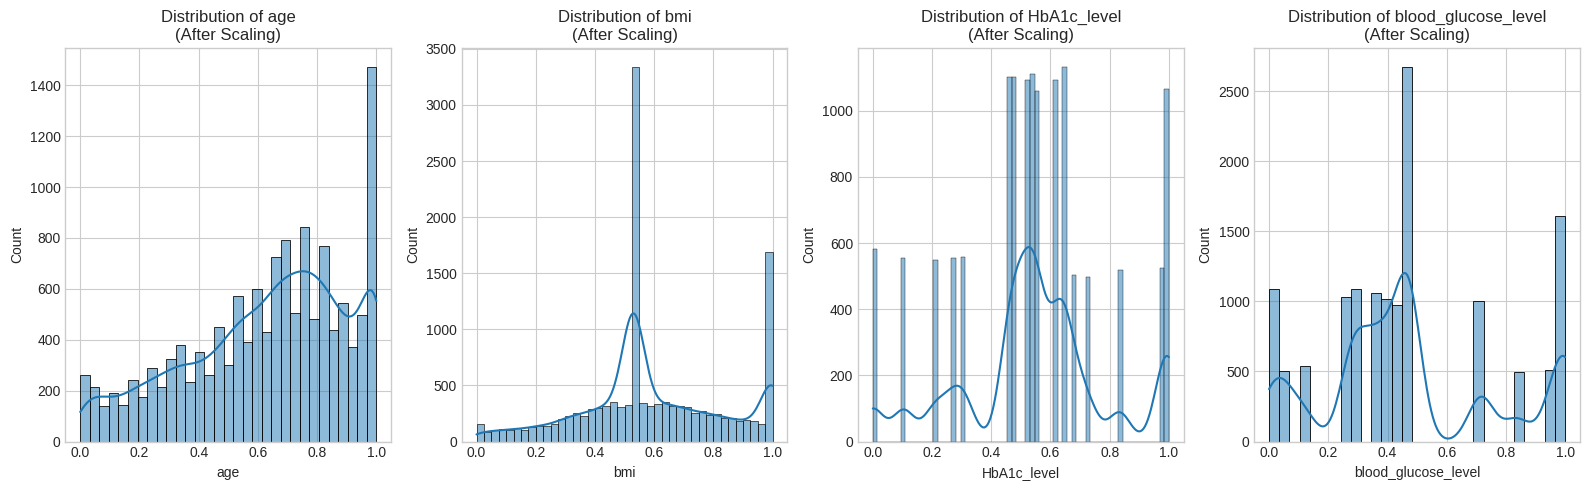

In [28]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# It's good practice to work on a copy of the data
df_scaled = df_balanced.copy()

# Fit the scaler to the data and then transform it.
# This learns the min/max for each column and then applies the scaling formula.
df_scaled[columns_to_scale] = scaler.fit_transform(df_balanced[columns_to_scale])

print("Data has been successfully scaled using MinMaxScaler.")
print("Here are the first 5 rows of the scaled data:")
df_scaled.head()

# --- EDA: Visualizing Data AFTER Scaling ---
print("\nPlotting feature distributions after scaling...")

plt.figure(figsize=(16, 5))

# Loop through each column and create a histogram for the SCALED data
for i, col in enumerate(columns_to_scale):
    plt.subplot(1, 4, i+1)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Distribution of {col}\n(After Scaling)')
plt.tight_layout()
plt.show()

In [29]:
# Save the FINAL, fully processed dataset. This is ready for Feature Engineering.
df_scaled.to_csv('IT24100300_scaling.csv', index=False)

print("\nFinal scaled dataset has been successfully saved as 'IT24100300_scaling.csv'")


Final scaled dataset has been successfully saved as 'IT24100300_scaling.csv'


In [30]:
print("Here are the first 5 rows of Test dataset :")
X_test.head()

Here are the first 5 rows of Test dataset :


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,gender_encoded
95736,23,0,0,27.32,4.5,90,1,0,0,0,0,0,0
28437,68,0,0,27.32,6.2,159,0,0,0,1,0,0,1
59908,42,0,0,26.17,6.5,145,0,0,0,0,1,0,1
43687,27,0,0,27.32,6.5,90,1,0,0,0,0,0,1
87975,71,0,0,27.16,5.8,145,1,0,0,0,0,0,0


In [31]:
# Define the same list of columns that you scaled in the training set
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# It's good practice to create a copy so you don't alter the original test set in memory
X_test_scaled = X_test.copy()

# Use the EXISTING scaler from the training process to TRANSFORM the test data
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

print("Test data has been successfully scaled.")
print("\nFirst 5 rows of the SCALED test data:")
X_test_scaled.head()

Test data has been successfully scaled.

First 5 rows of the SCALED test data:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,gender_encoded
95736,0.278481,0,0,0.529461,0.208333,0.059701,1,0,0,0,0,0,0
28437,0.848101,0,0,0.529461,0.562500,0.471642,0,0,0,1,0,0,1
59908,0.518987,0,0,0.481061,0.625000,0.388060,0,0,0,0,1,0,1
43687,0.329114,0,0,0.529461,0.625000,0.059701,1,0,0,0,0,0,1
87975,0.886076,0,0,0.522727,0.479167,0.388060,1,0,0,0,0,0,0


In [32]:
# Check the statistical summary of the scaled test data.
# The min and max values will be close to 0 and 1, but maybe not exactly, which is correct.
print("Statistical summary of the scaled TEST data:")
print(X_test_scaled[columns_to_scale].describe())

Statistical summary of the scaled TEST data:
                age           bmi   HbA1c_level  blood_glucose_level
count  19997.000000  19997.000000  19997.000000         19997.000000
mean       0.520552      0.528072      0.421935             0.348087
std        0.281152      0.276919      0.223307             0.243493
min        0.000000     -0.190657      0.000000             0.000000
25%        0.291139      0.372475      0.270833             0.119403
50%        0.531646      0.529461      0.479167             0.358209
75%        0.734177      0.623316      0.562500             0.471642
max        1.000000      2.904040      1.145833             1.313433


In [33]:
# Save the scaled test features to a new CSV file.
# This file is now ready for model evaluation.
X_test_scaled.to_csv('X_test_scaled.csv', index=False)

print("\nFinal scaled test set features have been saved as 'X_test_scaled.csv'")


Final scaled test set features have been saved as 'X_test_scaled.csv'



 Performing Feature Selection Analysis...

--- Feature Selection Results ---
Features with absolute correlation > 0.1 with 'diabetes':
age                    0.481542
hypertension           0.249363
heart_disease          0.206393
bmi                    0.357263
HbA1c_level            0.605264
blood_glucose_level    0.546461
smoking_No Info        0.237002
smoking_former         0.147994
diabetes               1.000000
Name: diabetes, dtype: float64

Final selected features for the model: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_No Info', 'smoking_former']

--- FINAL DATASETS READY FOR DOWNLOAD ---
New datasets with only the selected features have been saved:
- final_selected_X_train.csv
- final_selected_X_test.csv

Use these along with 'final_y_train.csv' and 'final_y_test.csv' for model training.


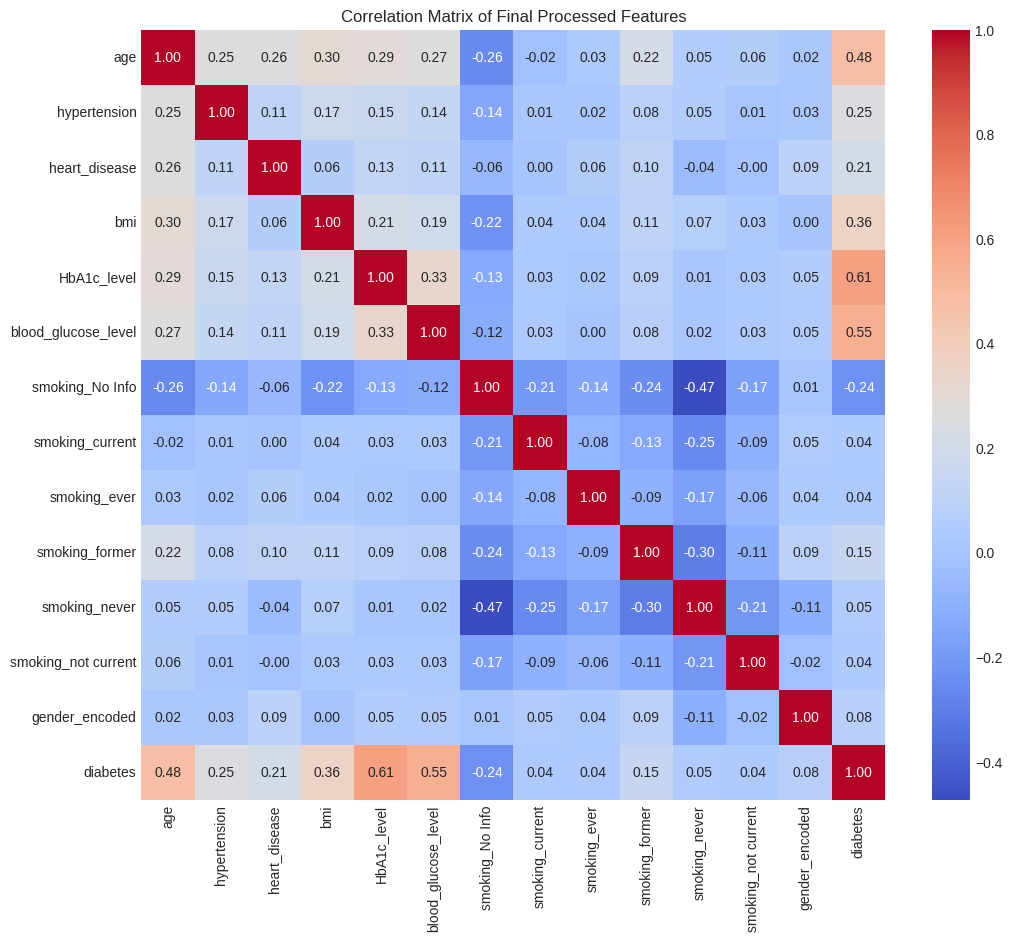

In [36]:
# =============================================================================
# Feature Engineering & Selection
# =============================================================================
# The goal of this step is to identify and select the most predictive features
# to potentially improve model performance and reduce complexity.

print("\n Performing Feature Selection Analysis...")

# --- EDA Visualization: Correlation Matrix Heatmap ---
final_train_df_for_corr = df_scaled.copy()

# Calculate the correlation matrix
# This shows how strongly each feature is related to every other feature,
# and most importantly, to the 'diabetes' target variable.
corr_matrix = final_train_df_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Final Processed Features')



# --- Automated Feature Selection ---
# We can now automatically select the features that have the strongest
# relationship with the 'diabetes' target.

# We select features with an absolute correlation value greater than a certain threshold (e.g., 0.1)
# This threshold can be adjusted based on your analysis.
correlation_target = abs(corr_matrix['diabetes'])
important_features = correlation_target[correlation_target > 0.1]

# Get the names of the selected columns (excluding the target 'diabetes' itself)
selected_columns = important_features.drop('diabetes').index.tolist()

print("\n--- Feature Selection Results ---")
print(f"Features with absolute correlation > 0.1 with 'diabetes':\n{important_features}")
print(f"\nFinal selected features for the model: {selected_columns}")


# =============================================================================
# Step 8: Save the Final, Changed Datasets for Download
# =============================================================================
# Now, we create the new, smaller datasets that contain ONLY the selected features.

# Filter the training and testing sets to keep only the important columns
# Separate features (X) and target (y)
X_train_scaled = df_scaled.drop('diabetes', axis=1)
y_train_scaled = df_scaled['diabetes']

X_train_selected = X_train_scaled[selected_columns]
X_test_selected = X_test_scaled[selected_columns]


# Save the final, selected datasets to new CSV files.
# These are the files you will use to train and test your model.
X_train_selected.to_csv('final_selected_X_train.csv', index=False)
X_test_selected.to_csv('final_selected_X_test.csv', index=False)

# The corresponding 'y' files do not change, so you will still use
# 'final_y_train.csv' and 'final_y_test.csv' from the previous step.

print("\n--- FINAL DATASETS READY FOR DOWNLOAD ---")
print("New datasets with only the selected features have been saved:")
print("- final_selected_X_train.csv")
print("- final_selected_X_test.csv")
print("\nUse these along with 'final_y_train.csv' and 'final_y_test.csv' for model training.")